<a href="https://colab.research.google.com/github/Wolf-gangSE/diabetes-prediction/blob/main/IA_ProjetoII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

clear_output()

In [ ]:
# Libraries

C
import matplotlib
import pandas as pd
import sklearn
import seaborn as sn

O módulo **sys** fornece funções e variáveis ​​usadas para manipular  diferentes partes do ambiente de tempo de execução do Python e apesar de serem completamente diferentes, muitas pessoas confundem o módulo sys e o módulo os (módulo para manipular o sistema operacional).
https://pt.stackoverflow.com/questions/432235/como-funciona-o-módulo-sys-do-python-e-para-que-ele-serve

**SciPy** é uma biblioteca Open Source em linguagem Python que foi feita para matemáticos, cientistas e engenheiros. Também tem o nome de uma popular conferência de programação científica com Python.[1][2]

A sua biblioteca central é **NumPy** que fornece uma manipulação conveniente e rápida de um array N-dimensional. A biblioteca SciPy foi desenvolvida para trabalhar com arrays NumPy, e fornece muitas rotinas amigáveis e bem eficientes como rotinas para integração numérica e otimização.[3]
https://pt.wikipedia.org/wiki/SciPy#:~:text=SciPy%20é%20uma%20biblioteca%20Open,de%20um%20array%20N-dimensional.

O **Matplotlib** é uma biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos. A ferramenta disponibiliza diversos tipos de gráficos, como em barra, em linha, em pizza, histogramas entre outras opções.

https://king.host/blog/2018/03/visualizacao-de-dados-matplotlib/#:~:text=O%20Matplotlib%20é%20uma%20biblioteca,pizza%2C%20histogramas%20entre%20outras%20opções.



**Pandas** é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para análise e manipulação de dados.

https://harve.com.br/blog/programacao-python-blog/pandas-python-vantagens-e-como-comecar/#:~:text=o%20Pandas%20Python%3F-,Pandas%20é%20uma%20biblioteca%20para%20uso%20em%20Python%2C%20open-source,análise%20e%20manipulação%20de%20dados.

O **Scikit-Learn** fornece ferramentas importantes para os vários momentos do ciclo de projetos de Machine Learning, como: Datasets: disponibiliza alguns datasets que podem ser baixados para o projeto com poucos comandos, como o dataset Iris, um dos mais conhecidos da área de reconhecimento de padrões.

https://tatianaesc.medium.com/implementando-um-modelo-de-classificação-no-scikit-learn-6206d684b377#:~:text=O%20Scikit-Learn%20fornece%20ferramentas,área%20de%20reconhecimento%20de%20padrões.


In [ ]:
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [ ]:
# load through url
# ler a url. É possível baixar o arquivo *.csv e adicionar o path
url = 'https://raw.githubusercontent.com/Wolf-gangSE/diabetes-prediction/main/diabetes_binary_health_indicators_BRFSS2015.csv'
dataset = pd.read_csv(url)

In [ ]:
plt.rcParams['figure.figsize'] = (15,14)

In [ ]:
#ter uma dimensão de quantas instâncias (linhas) e quantos atributos (colunas) os dados contêm
print(dataset.shape)

(253680, 22)


In [ ]:
#analisar os dados
print(dataset.head(150))

     Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
..               ...     ...       ...        ...   ...     ...     ...   
145              0.0     0.0       1.0        1.0  24.0     1.0     0.0   
146              0.0     1.0       1.0        1.0  39.0     1.0     1.0   
147              0.0     0.0       0.0        1.0  34.0     0.0     0.0   
148              0.0     1.0       1.0        1.0  27.0     1.0     0.0   
149              0.0     0.0       0.0        1.0  22.0     1.0     0.0   

     HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0.0   

In [ ]:
#ver resumo estatístico: contagem, média, valores mínimo e máximo, e alguns percentuais
print(dataset.describe())

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

In [ ]:
#distribuição por classe
print(dataset.groupby("Diabetes_binary").size())

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64


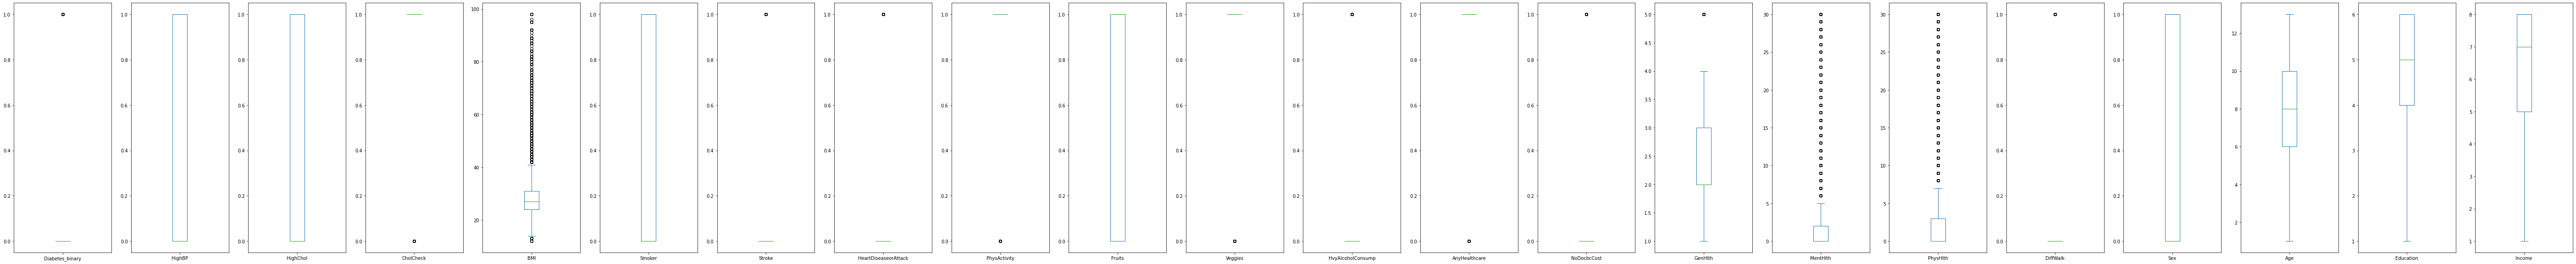

In [ ]:
#criar gráfico de caixas (bloxplot)
dataset.plot(kind='box', subplots=True, figsize=(100, 10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


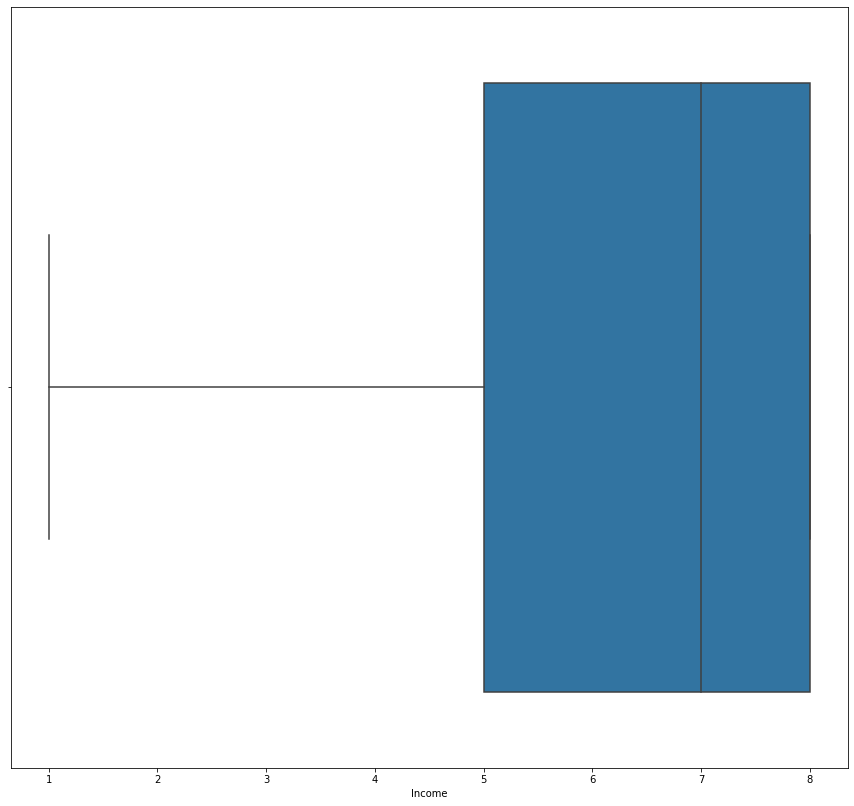

In [ ]:
sn.boxplot(dataset['Income'])

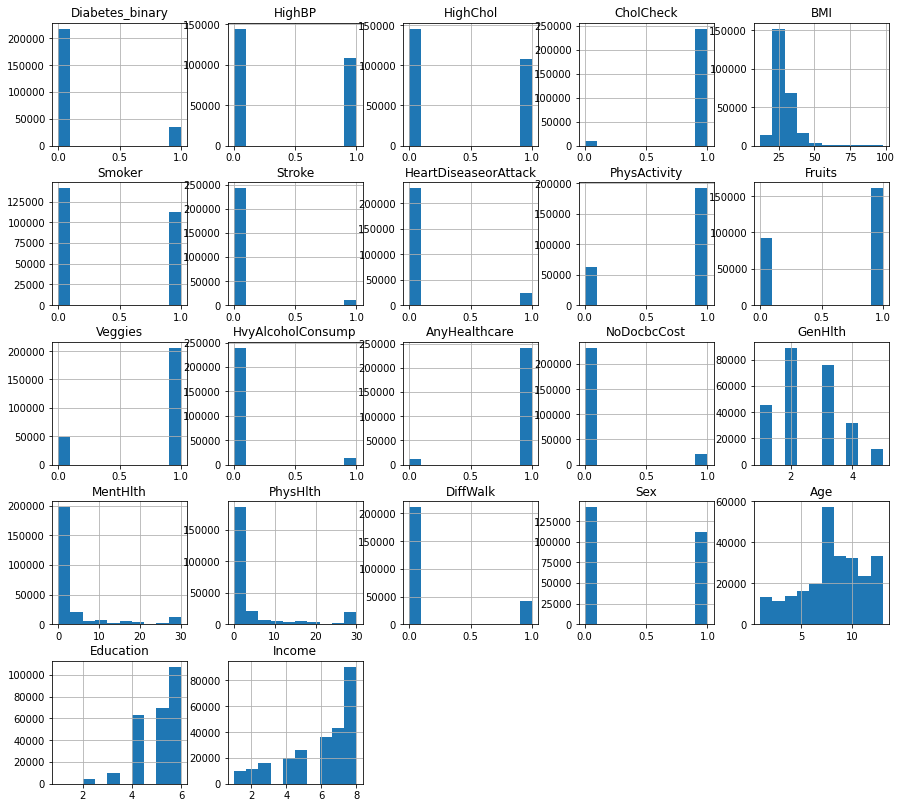

In [ ]:
# histogramas - diagramas de uma variável
dataset.hist()
plt.show()

O coeficiente de Pearson, também chamado de “coeficiente de correlação produto-momento” ou chamado de “ρ de Pearson”, mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta; Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa; Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável. Como podemos interpretar os valores que ρ pode assumir?

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte; ρ = 0,7 a 09 (positivo ou negativo): correlação forte; ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada; ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca; ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

https://medium.com/omixdata/estatística-análise-de-correlação-usando-python-e-r-d68611511b5a

In [ ]:
#análise da correlação
correlation = dataset.corr(method= "kendall")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


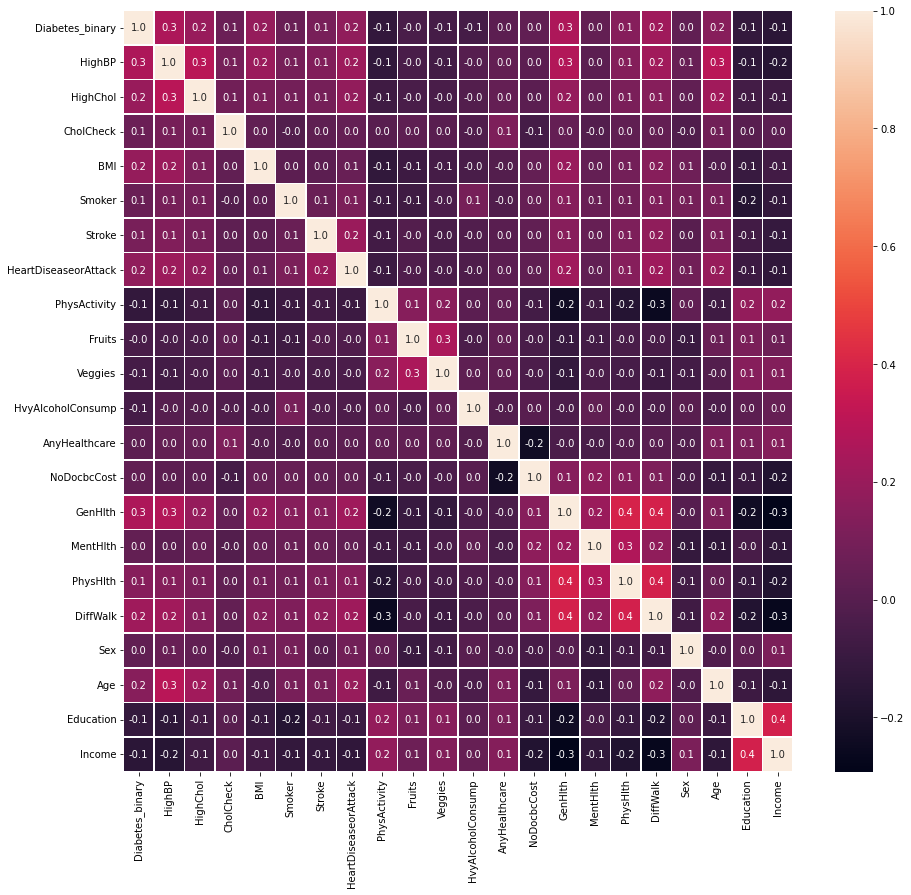

In [ ]:
# plot da matriz de correlação
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

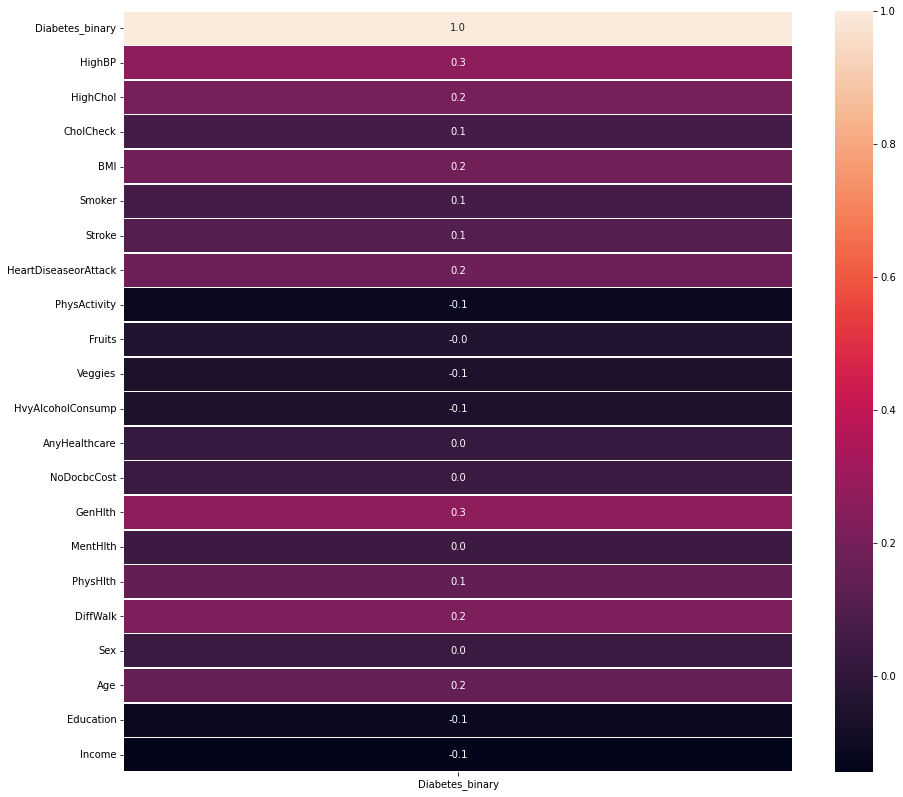

In [ ]:
# matriz de correlação da variável de saída
plot = sn.heatmap(correlation[["Diabetes_binary"]], annot = True, fmt=".1f", linewidths=.6)
plot

Variáveis Quantitativas: Informações quantitativas que são expressas na forma de valores numéricos. Podem ser contínuas ou discretas.

    - Variáveis discretas: São características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores. Exemplos: número de cartões, número de bactérias por litro de leite.
    - Variáveis contínuas: São características mensuráveis que assumem valores em uma escala contínua. Geralmente são medidas por algum instrumento de medida como a régua ao medir a altura, pressão arterial, idade.

Variáveis Qualitativas (ou categóricas): São características que apresentam informações qualitativas. Representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

    - Variáveis nominais: Não existe uma ordenação entre as categorias. Exemplo: cor dos olhos, doente/sadio, sexo.
    - Variáveis Ordinais: Existe uma ordenação entre as categorias. Exemplo: ranking de um jogo, escolaridade.

https://medium.com/data-hackers/pré-processamento-de-dados-com-python-53b95bcf5ff4

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
print(dataset)

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHea

In [ ]:
dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Dividindo dataset
array = dataset.values
X = array[:,1:21]
Y = array[:,0:1]

Testando a Validação Cruzada

In [ ]:
# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   Y = Y.ravel()
   kfold = model_selection.KFold(n_splits=10)#setar o embaralhamento
   cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.863024 (0.007478)
LDA: 0.861069 (0.008356)
KNN: 0.847323 (0.005973)
CART: 0.802543 (0.006947)
NB: 0.774980 (0.010501)


O método SVM foi retirado do teste, pois como o dataset possui uma grande quantidade de dados o desempenho não foi bom. Passaram-se mais de 4 horas de execução.

Dentre os métodos avaliados o que apresentou a melhor acurácia foi o LDA (Linear Discriminant Analysis).

# Melhorias

## Overview do dataset

In [ ]:
profile = ProfileReport(dataset)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Removendo linhas repetidas

In [ ]:
# Removendo as linhas duplicadas
no_dup_dataset = dataset.drop_duplicates(inplace = True)

In [ ]:
duplicate = no_dup_dataset[no_dup_dataset.duplicated()]
print("Linhas duplicadas: ", len(duplicate))

Linhas duplicadas:  0


In [ ]:
#distribuição por classe
print(no_dup_dataset.groupby("Diabetes_binary").size())

Diabetes_binary
0    194377
1     35097
dtype: int64


In [ ]:
# Dividindo dataset
array = no_dup_dataset.values
X = array[:,1:21]
Y = array[:,0:1]

In [ ]:
# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   Y = Y.ravel()
   kfold = model_selection.KFold(n_splits=10)#setar o embaralhamento
   cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.849626 (0.009301)
LDA: 0.848732 (0.009770)
KNN: 0.831759 (0.008544)
CART: 0.781522 (0.009449)
NB: 0.756870 (0.013931)


## Removendo colunas

In [ ]:
new_dataset = dataset.drop(['Fruits', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Sex'],axis=1)

In [ ]:
print(new_dataset.shape)

(253680, 17)


In [ ]:
# Dividindo dataset
array = new_dataset.values
X = array[:,1:16]
Y = array[:,0:1]

In [ ]:
# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   Y = Y.ravel()
   kfold = model_selection.KFold(n_splits=10)#setar o embaralhamento
   cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.863024 (0.007321)
LDA: 0.861073 (0.008438)
KNN: 0.847848 (0.005447)
CART: 0.816123 (0.007540)
NB: 0.777858 (0.010320)


## Removendo Outliers

In [ ]:
from scipy import stats

In [ ]:
z = numpy.abs(stats.zscore(new_dataset))
print(z)

        Diabetes_binary    HighBP  HighChol  CholCheck       BMI    Smoker  \
0              0.402355  1.153688  1.165254   0.196922  1.757936  1.120927   
1              0.402355  0.866785  0.858182   5.078164  0.511806  1.120927   
2              0.402355  1.153688  1.165254   0.196922  0.057858  0.892119   
3              0.402355  1.153688  0.858182   0.196922  0.209174  0.892119   
4              0.402355  1.153688  1.165254   0.196922  0.663122  0.892119   
...                 ...       ...       ...        ...       ...       ...   
253675         0.402355  1.153688  1.165254   0.196922  2.514516  0.892119   
253676         2.485367  1.153688  1.165254   0.196922  1.571019  0.892119   
253677         0.402355  0.866785  0.858182   0.196922  0.057858  0.892119   
253678         0.402355  1.153688  0.858182   0.196922  0.814438  0.892119   
253679         2.485367  1.153688  1.165254   0.196922  0.511806  0.892119   

          Stroke  HeartDiseaseorAttack  PhysActivity   Veggies 

In [ ]:
new_dataset_Z = new_dataset[(z < 3).all(axis=1)]

In [ ]:
new_dataset_Z.shape

(196579, 17)

In [ ]:
#distribuição por classe
print(new_dataset_Z.groupby("Diabetes_binary").size())

Diabetes_binary
0.0    173122
1.0     23457
dtype: int64


In [ ]:
# Dividindo dataset
array = new_dataset_Z.values
X = array[:,1:16]
Y = array[:,0:1]

In [ ]:
# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   Y = Y.ravel()
   kfold = model_selection.KFold(n_splits=10)#setar o embaralhamento
   cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.881503 (0.004982)
LDA: 0.880287 (0.005073)
KNN: 0.867722 (0.005322)
CART: 0.839261 (0.005573)
NB: 0.820103 (0.008010)
